In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats

import matplotlib.pyplot as plt

In [2]:
gdp_quarterly_constant_prices_df = pd.read_csv('../Datasets\\Gross Domestic Product\\GDP_Quarterly_Constant_Prices.csv')
gdp_quarterly_current_prices_df = pd.read_csv('../Datasets\\Gross Domestic Product\\GDP_Quarterly_Current_Prices.csv')

# GDP Quarterly Constant Prices

## Data Understanding

In [3]:
gdp_quarterly_constant_prices_df.head()

,DATAFLOW,REF_AREA,FREQ,UNIT_MEASURE,SOURCE_DETAIL,MEASURE,QUARTER,QGDP_SYS,QGDP_UNIT,TIME_PERIOD,OBS_VALUE,OBS_STATUS,UNIT_MULT,OBS_COMMENT,DECIMALS
0,FCSA:DF_QGDP_CON(1.8.0),AE,Q,MILAED,FCSC,ELE,Q1,CON,VAL,2012,6029.460989,NaN,NaN,NaN,0
1,FCSA:DF_QGDP_CON(1.8.0),AE,Q,MILAED,FCSC,ELE,Q1,CON,VAL,2013,6516.431786,NaN,NaN,NaN,0
2,FCSA:DF_QGDP_CON(1.8.0),AE,Q,MILAED,FCSC,ELE,Q1,CON,VAL,2014,7282.519220,NaN,NaN,NaN,0
3,FCSA:DF_QGDP_CON(1.8.0),AE,Q,MILAED,FCSC,ELE,Q1,CON,VAL,2015,5581.622819,NaN,NaN,NaN,0
4,FCSA:DF_QGDP_CON(1.8.0),AE,Q,MILAED,FCSC,ELE,Q1,CON,VAL,2016,6507.318473,NaN,NaN,NaN,0


In [4]:
gdp_quarterly_constant_prices_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1920 entries, 0 to 1919
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   DATAFLOW       1920 non-null   object 
 1   REF_AREA       1920 non-null   object 
 2   FREQ           1920 non-null   object 
 3   UNIT_MEASURE   1920 non-null   object 
 4   SOURCE_DETAIL  1920 non-null   object 
 5   MEASURE        1920 non-null   object 
 6   QUARTER        1920 non-null   object 
 7   QGDP_SYS       1920 non-null   object 
 8   QGDP_UNIT      1920 non-null   object 
 9   TIME_PERIOD    1920 non-null   int64  
 10  OBS_VALUE      1920 non-null   float64
 11  OBS_STATUS     0 non-null      float64
 12  UNIT_MULT      0 non-null      float64
 13  OBS_COMMENT    0 non-null      float64
 14  DECIMALS       1920 non-null   int64  
dtypes: float64(4), int64(2), object(9)
memory usage: 225.1+ KB


In [5]:
for column in gdp_quarterly_constant_prices_df.columns:
    unique_values = gdp_quarterly_constant_prices_df[column].nunique()
    print("{:<30}{}".format(column, unique_values))

DATAFLOW                      1
REF_AREA                      1
FREQ                          1
UNIT_MEASURE                  2
SOURCE_DETAIL                 1
MEASURE                       20
QUARTER                       4
QGDP_SYS                      1
QGDP_UNIT                     2
TIME_PERIOD                   13
OBS_VALUE                     1920
OBS_STATUS                    0
UNIT_MULT                     0
OBS_COMMENT                   0
DECIMALS                      2


In [6]:
for column in gdp_quarterly_constant_prices_df.columns:
    unique_values = gdp_quarterly_constant_prices_df[column].value_counts()
    print("{:<30}{}".format(column, unique_values))

DATAFLOW                      DATAFLOW
FCSA:DF_QGDP_CON(1.8.0)    1920
Name: count, dtype: int64
REF_AREA                      REF_AREA
AE    1920
Name: count, dtype: int64
FREQ                          FREQ
Q    1920
Name: count, dtype: int64
UNIT_MEASURE                  UNIT_MEASURE
MILAED     1000
PERCENT     920
Name: count, dtype: int64
SOURCE_DETAIL                 SOURCE_DETAIL
FCSC    1920
Name: count, dtype: int64
MEASURE                       MEASURE
ELE        96
CON        96
INF        96
MIN        96
TOT_NO     96
TOT_GDP    96
ACT        96
FIN        96
NFC        96
ACC        96
WHO        96
REA        96
ART        96
HUM        96
EDU        96
TRA        96
AGR        96
PUB        96
PRO        96
MAN        96
Name: count, dtype: int64
QUARTER                       QUARTER
Q1    500
Q2    500
Q3    460
Q4    460
Name: count, dtype: int64
QGDP_SYS                      QGDP_SYS
CON    1920
Name: count, dtype: int64
QGDP_UNIT                     QGDP_UNIT
VAL    

In [7]:
gdp_quarterly_constant_prices_df.duplicated().sum()

0

In [8]:
gdp_quarterly_constant_prices_df.isnull().sum()

DATAFLOW            0
REF_AREA            0
FREQ                0
UNIT_MEASURE        0
SOURCE_DETAIL       0
MEASURE             0
QUARTER             0
QGDP_SYS            0
QGDP_UNIT           0
TIME_PERIOD         0
OBS_VALUE           0
OBS_STATUS       1920
UNIT_MULT        1920
OBS_COMMENT      1920
DECIMALS            0
dtype: int64

array([[<Axes: title={'center': 'TIME_PERIOD'}>,
        <Axes: title={'center': 'OBS_VALUE'}>],
       [<Axes: title={'center': 'OBS_STATUS'}>,
        <Axes: title={'center': 'UNIT_MULT'}>],
       [<Axes: title={'center': 'OBS_COMMENT'}>,
        <Axes: title={'center': 'DECIMALS'}>]], dtype=object)

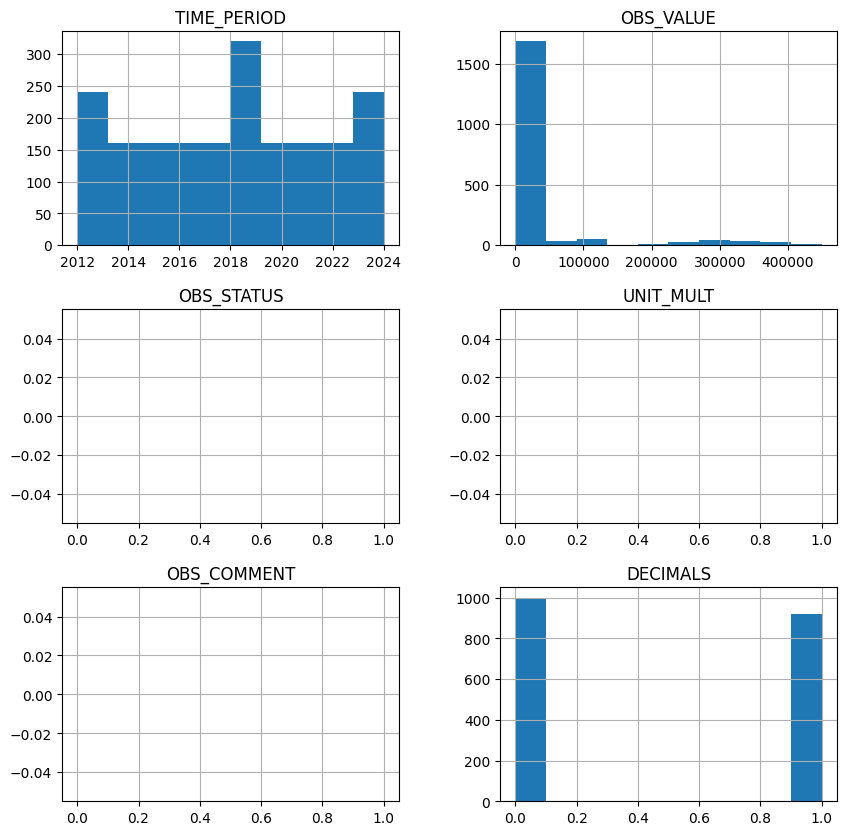

In [9]:
gdp_quarterly_constant_prices_df.hist(figsize=(10, 10))

## Data Cleaning

In [10]:
gdp_quarterly_constant_prices_df.drop(columns=['OBS_STATUS', 'UNIT_MULT','OBS_COMMENT'], inplace = True)

In [11]:
cols_to_drop = [col for col in gdp_quarterly_constant_prices_df.columns if gdp_quarterly_constant_prices_df[col].nunique() == 1]
gdp_quarterly_constant_prices_df = gdp_quarterly_constant_prices_df.drop(columns=cols_to_drop)

In [12]:
gdp_quarterly_constant_prices_df.rename(columns={'UNIT_MEASURE': 'Unit of Measure', 'MEASURE': 'Measure','QUARTER': 'Quarter','QGDP_UNIT':'GDP Unit','TIME_PERIOD': 'Time Period', 'OBS_VALUE': 'Value'}, inplace=True)

In [13]:
gdp_quarterly_constant_prices_df['Unit of Measure'] = gdp_quarterly_constant_prices_df['Unit of Measure'].replace({
    'MILAED': 'AED Million',
    'PERCENT': 'percent'
})

In [14]:
gdp_quarterly_constant_prices_df['Measure'] = gdp_quarterly_constant_prices_df['Measure'].replace({
    'NFC': 'Non Financial Corporations',
    'AGR': 'Agriculture, Forestry and Fishing',
    'MIN' : 'Mining and Quarrying',
    'MAN' : 'Manufacturing',
    'ELE' : 'Electricity, gas, and Water Supply',
    'CON' : 'Construction',
    'WHO' : 'Wholesale and Retail Trade',
    'TRA' : 'Transportation and Storage',
    'ACC' : 'Accomodation and Food Service Activities',
    'INF' : 'Information and Communication',
    'FIN' : 'Financial and Insurance Activities',
    'REA' : 'Real Estate Activities',
    'PRO' : 'Professional Activities',
    'PUB' : 'Public Administration and Defence',
    'EDU' : 'Education',
    'HUM' : 'Human Health and Social work Activities',
    'ART' : 'Arts and Other Service Activities',
    'ACT' : 'Activities of Households as Employers',
    'TOT_GDP' : 'Gross Domestic Product',
    'TOT_NO' : 'Non-oil Gross Domestic Product'
})

In [15]:
gdp_quarterly_constant_prices_df['GDP Unit'] = gdp_quarterly_constant_prices_df['GDP Unit'].replace({
    'VAL': 'Value',
    'GWTH_RATE': 'Annual growth rate',
})

In [31]:
# gdp_quarterly_constant_prices_df.to_csv('../Cleaned Datasets\\Gross Domestic Product\\GDP_Quarterly_Constant_Prices.csv', index=False)

# GDP Quarterly Constant Prices

## Data Understanding

In [17]:
gdp_quarterly_current_prices_df.head()

,DATAFLOW,REF_AREA,FREQ,UNIT_MEASURE,SOURCE_DETAIL,MEASURE,QUARTER,QGDP_SYS,QGDP_UNIT,TIME_PERIOD,OBS_VALUE,OBS_STATUS,UNIT_MULT,OBS_COMMENT,DECIMALS
0,FCSA:DF_QGDP_CUR(1.8.0),AE,Q,PERCENT,FCSC,NFC,Q3,CUR,GWTH_RATE,2013,4.355075,NaN,NaN,NaN,1
1,FCSA:DF_QGDP_CUR(1.8.0),AE,Q,PERCENT,FCSC,NFC,Q3,CUR,GWTH_RATE,2014,4.394883,NaN,NaN,NaN,1
2,FCSA:DF_QGDP_CUR(1.8.0),AE,Q,PERCENT,FCSC,NFC,Q3,CUR,GWTH_RATE,2015,-15.526115,NaN,NaN,NaN,1
3,FCSA:DF_QGDP_CUR(1.8.0),AE,Q,PERCENT,FCSC,NFC,Q3,CUR,GWTH_RATE,2016,-1.059347,NaN,NaN,NaN,1
4,FCSA:DF_QGDP_CUR(1.8.0),AE,Q,PERCENT,FCSC,NFC,Q3,CUR,GWTH_RATE,2017,3.219329,NaN,NaN,NaN,1


In [18]:
gdp_quarterly_current_prices_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1920 entries, 0 to 1919
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   DATAFLOW       1920 non-null   object 
 1   REF_AREA       1920 non-null   object 
 2   FREQ           1920 non-null   object 
 3   UNIT_MEASURE   1920 non-null   object 
 4   SOURCE_DETAIL  1920 non-null   object 
 5   MEASURE        1920 non-null   object 
 6   QUARTER        1920 non-null   object 
 7   QGDP_SYS       1920 non-null   object 
 8   QGDP_UNIT      1920 non-null   object 
 9   TIME_PERIOD    1920 non-null   int64  
 10  OBS_VALUE      1920 non-null   float64
 11  OBS_STATUS     0 non-null      float64
 12  UNIT_MULT      0 non-null      float64
 13  OBS_COMMENT    0 non-null      float64
 14  DECIMALS       1920 non-null   int64  
dtypes: float64(4), int64(2), object(9)
memory usage: 225.1+ KB


In [19]:
for column in gdp_quarterly_current_prices_df.columns:
    unique_values = gdp_quarterly_current_prices_df[column].nunique()
    print("{:<30}{}".format(column, unique_values))

DATAFLOW                      1
REF_AREA                      1
FREQ                          1
UNIT_MEASURE                  2
SOURCE_DETAIL                 1
MEASURE                       20
QUARTER                       4
QGDP_SYS                      1
QGDP_UNIT                     2
TIME_PERIOD                   13
OBS_VALUE                     1920
OBS_STATUS                    0
UNIT_MULT                     0
OBS_COMMENT                   0
DECIMALS                      2


In [20]:
for column in gdp_quarterly_current_prices_df.columns:
    unique_values = gdp_quarterly_current_prices_df[column].value_counts()
    print("{:<30}{}".format(column, unique_values))

DATAFLOW                      DATAFLOW
FCSA:DF_QGDP_CUR(1.8.0)    1920
Name: count, dtype: int64
REF_AREA                      REF_AREA
AE    1920
Name: count, dtype: int64
FREQ                          FREQ
Q    1920
Name: count, dtype: int64
UNIT_MEASURE                  UNIT_MEASURE
MILAED     1000
PERCENT     920
Name: count, dtype: int64
SOURCE_DETAIL                 SOURCE_DETAIL
FCSC    1920
Name: count, dtype: int64
MEASURE                       MEASURE
NFC        96
FIN        96
ACT        96
INF        96
TRA        96
TOT_NO     96
EDU        96
AGR        96
ELE        96
MAN        96
ART        96
TOT_GDP    96
PRO        96
HUM        96
PUB        96
CON        96
REA        96
MIN        96
WHO        96
ACC        96
Name: count, dtype: int64
QUARTER                       QUARTER
Q2    500
Q1    500
Q3    460
Q4    460
Name: count, dtype: int64
QGDP_SYS                      QGDP_SYS
CUR    1920
Name: count, dtype: int64
QGDP_UNIT                     QGDP_UNIT
VAL    

In [21]:
gdp_quarterly_current_prices_df.duplicated().sum()

0

In [22]:
gdp_quarterly_current_prices_df.isnull().sum()

DATAFLOW            0
REF_AREA            0
FREQ                0
UNIT_MEASURE        0
SOURCE_DETAIL       0
MEASURE             0
QUARTER             0
QGDP_SYS            0
QGDP_UNIT           0
TIME_PERIOD         0
OBS_VALUE           0
OBS_STATUS       1920
UNIT_MULT        1920
OBS_COMMENT      1920
DECIMALS            0
dtype: int64

array([[<Axes: title={'center': 'TIME_PERIOD'}>,
        <Axes: title={'center': 'OBS_VALUE'}>],
       [<Axes: title={'center': 'OBS_STATUS'}>,
        <Axes: title={'center': 'UNIT_MULT'}>],
       [<Axes: title={'center': 'OBS_COMMENT'}>,
        <Axes: title={'center': 'DECIMALS'}>]], dtype=object)

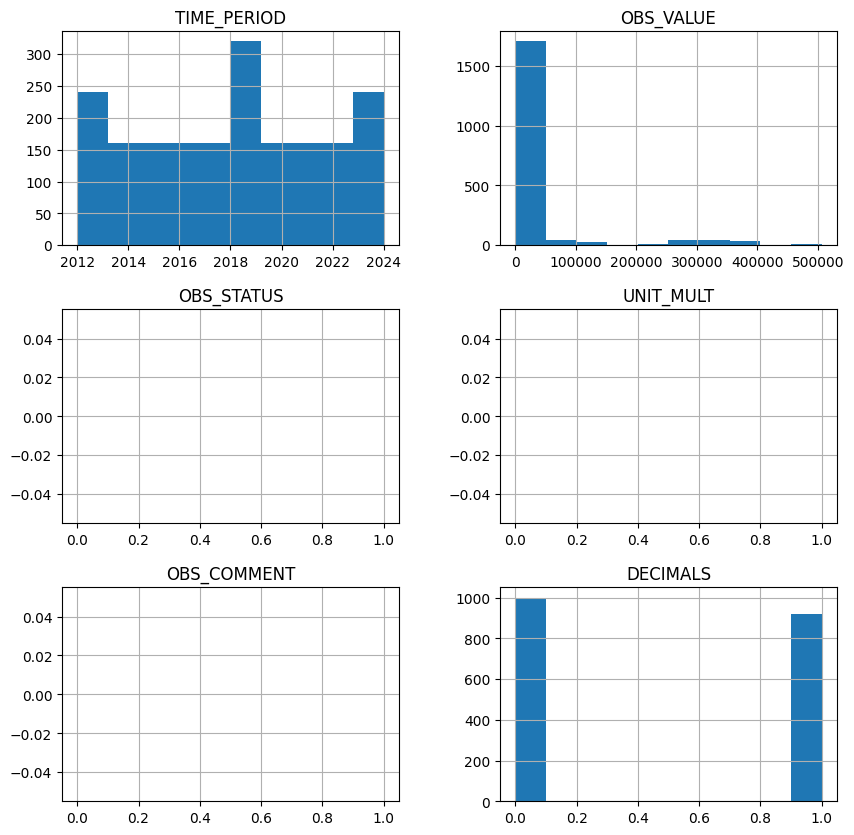

In [23]:
gdp_quarterly_current_prices_df.hist(figsize=(10, 10))

## Data Cleaning

In [24]:
gdp_quarterly_current_prices_df.drop(columns=['OBS_STATUS', 'UNIT_MULT','OBS_COMMENT'], inplace = True)

In [25]:
cols_to_drop = [col for col in gdp_quarterly_current_prices_df.columns if gdp_quarterly_current_prices_df[col].nunique() == 1]
gdp_quarterly_current_prices_df = gdp_quarterly_current_prices_df.drop(columns=cols_to_drop)

In [26]:
gdp_quarterly_current_prices_df.rename(columns={'UNIT_MEASURE': 'Unit of Measure', 'MEASURE': 'Measure','QUARTER': 'Quarter','QGDP_UNIT':'GDP Unit','TIME_PERIOD': 'Time Period', 'OBS_VALUE': 'Value'}, inplace=True)

In [27]:
gdp_quarterly_current_prices_df['Unit of Measure'] = gdp_quarterly_current_prices_df['Unit of Measure'].replace({
    'MILAED': 'AED Million',
    'PERCENT': 'percent'
})

In [28]:
gdp_quarterly_current_prices_df['Measure'] = gdp_quarterly_current_prices_df['Measure'].replace({
    'NFC': 'Non Financial Corporations',
    'AGR': 'Agriculture, Forestry and Fishing',
    'MIN' : 'Mining and Quarrying',
    'MAN' : 'Manufacturing',
    'ELE' : 'Electricity, gas, and Water Supply',
    'CON' : 'Construction',
    'WHO' : 'Wholesale and Retail Trade',
    'TRA' : 'Transportation and Storage',
    'ACC' : 'Accomodation and Food Service Activities',
    'INF' : 'Information and Communication',
    'FIN' : 'Financial and Insurance Activities',
    'REA' : 'Real Estate Activities',
    'PRO' : 'Professional Activities',
    'PUB' : 'Public Administration and Defence',
    'EDU' : 'Education',
    'HUM' : 'Human Health and Social work Activities',
    'ART' : 'Arts and Other Service Activities',
    'ACT' : 'Activities of Households as Employers',
    'TOT_GDP' : 'Gross Domestic Product',
    'TOT_NO' : 'Non-oil Gross Domestic Product'
})

In [29]:
gdp_quarterly_current_prices_df['GDP Unit'] = gdp_quarterly_current_prices_df['GDP Unit'].replace({
    'VAL': 'Value',
    'GWTH_RATE': 'Annual growth rate',
})

In [32]:
# gdp_quarterly_current_prices_df.to_csv('../Cleaned Datasets\\Gross Domestic Product\\GDP_Quarterly_Current_Prices.csv', index=False)

# Pumping Data into Mongodb

In [30]:
# from pymongo import MongoClient
# from dotenv import load_dotenv
# import os

# # Connect to MongoDB
# load_dotenv()

# client = MongoClient(os.environ['MONGODB_URI_1'])  # Uses the connection string from your .env file
# db = client['tourism_db']

# # Convert DataFrame to dictionary
# gdp_quarterly_constant_prices_df = gdp_quarterly_constant_prices_df.to_dict('records')
# gdp_quarterly_current_prices_df = gdp_quarterly_current_prices_df.to_dict('records')

# # Insert into MongoDB collections
# db['guests_by_hotel_type_by_region'].insert_many(gdp_quarterly_constant_prices_df)
# db['gdp_quarterly_current_prices_df'].insert_many(gdp_quarterly_current_prices_df)

# print("Data pumped into MongoDB successfully!")